## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

In [19]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [20]:
# Random state seed
rseed = 42

## Load and explore data

In [21]:
# Import the dataset

ds = pd.read_csv('Country-data.csv')
ds.head()



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [22]:
# Check the shape

ds.shape

(167, 10)

In [23]:
# Check datatypes & counts

ds = ds.select_dtypes(include=['int', 'float'])
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


In [24]:
# Get descriptive statistics

descr_stats = ds.describe()
print(descr_stats)

       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000

In [25]:
# Identify any missing data

ds.isnull().sum()
# df_numeric = ds.select_dtypes(include='number')

# Identify any missing data
# missing_values = df_numeric.isnull().sum()
# print(missing_values)

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Preprocessing and Feature Selection

In [26]:
# Drop any non-numeric features (columns)

ds = ds.select_dtypes(include=np.number)

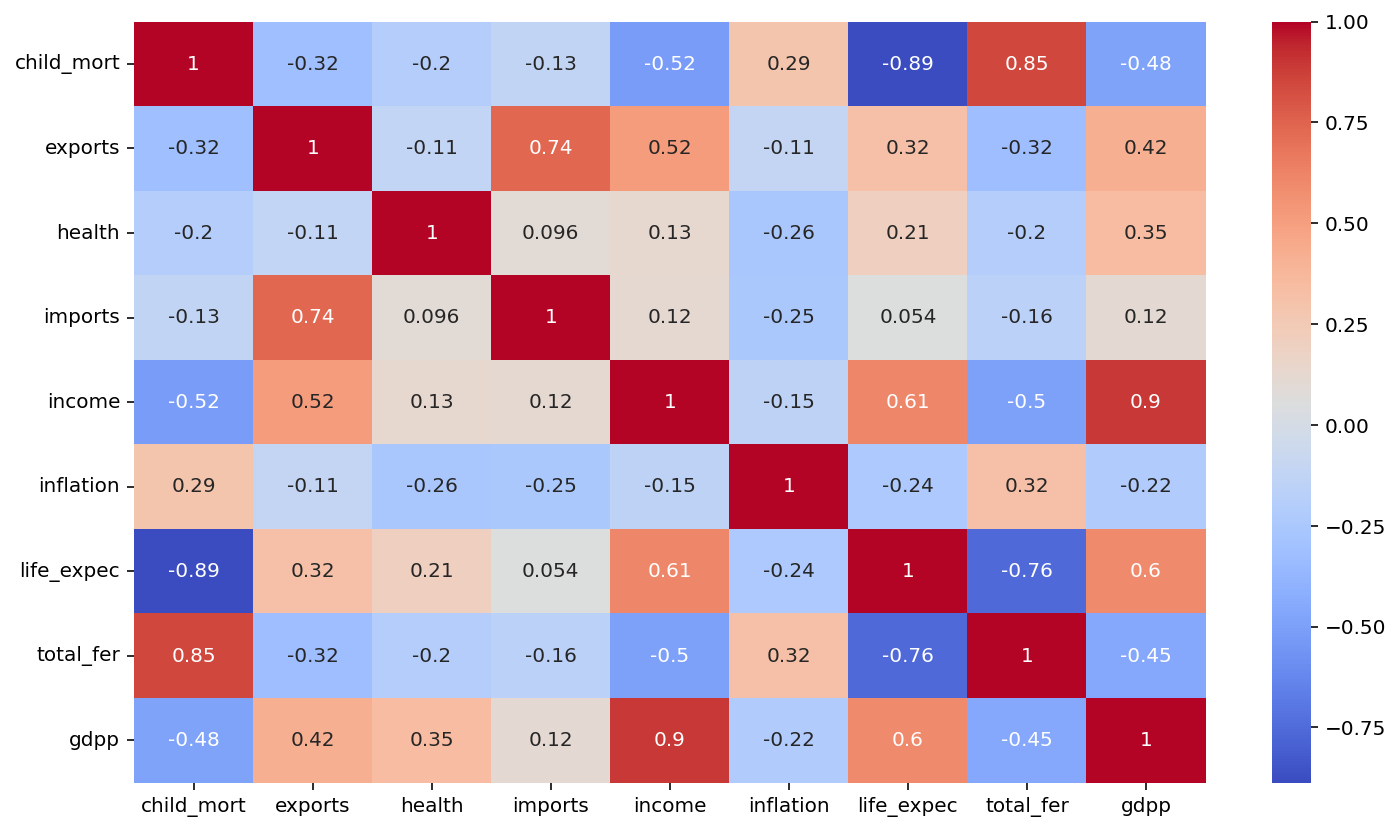

In [27]:
# Create a correlation map of features to explore relationships between features
# Hint: Explore seaborn heatmap
numeric_data = ds.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()
# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Display the plot
plt.show()


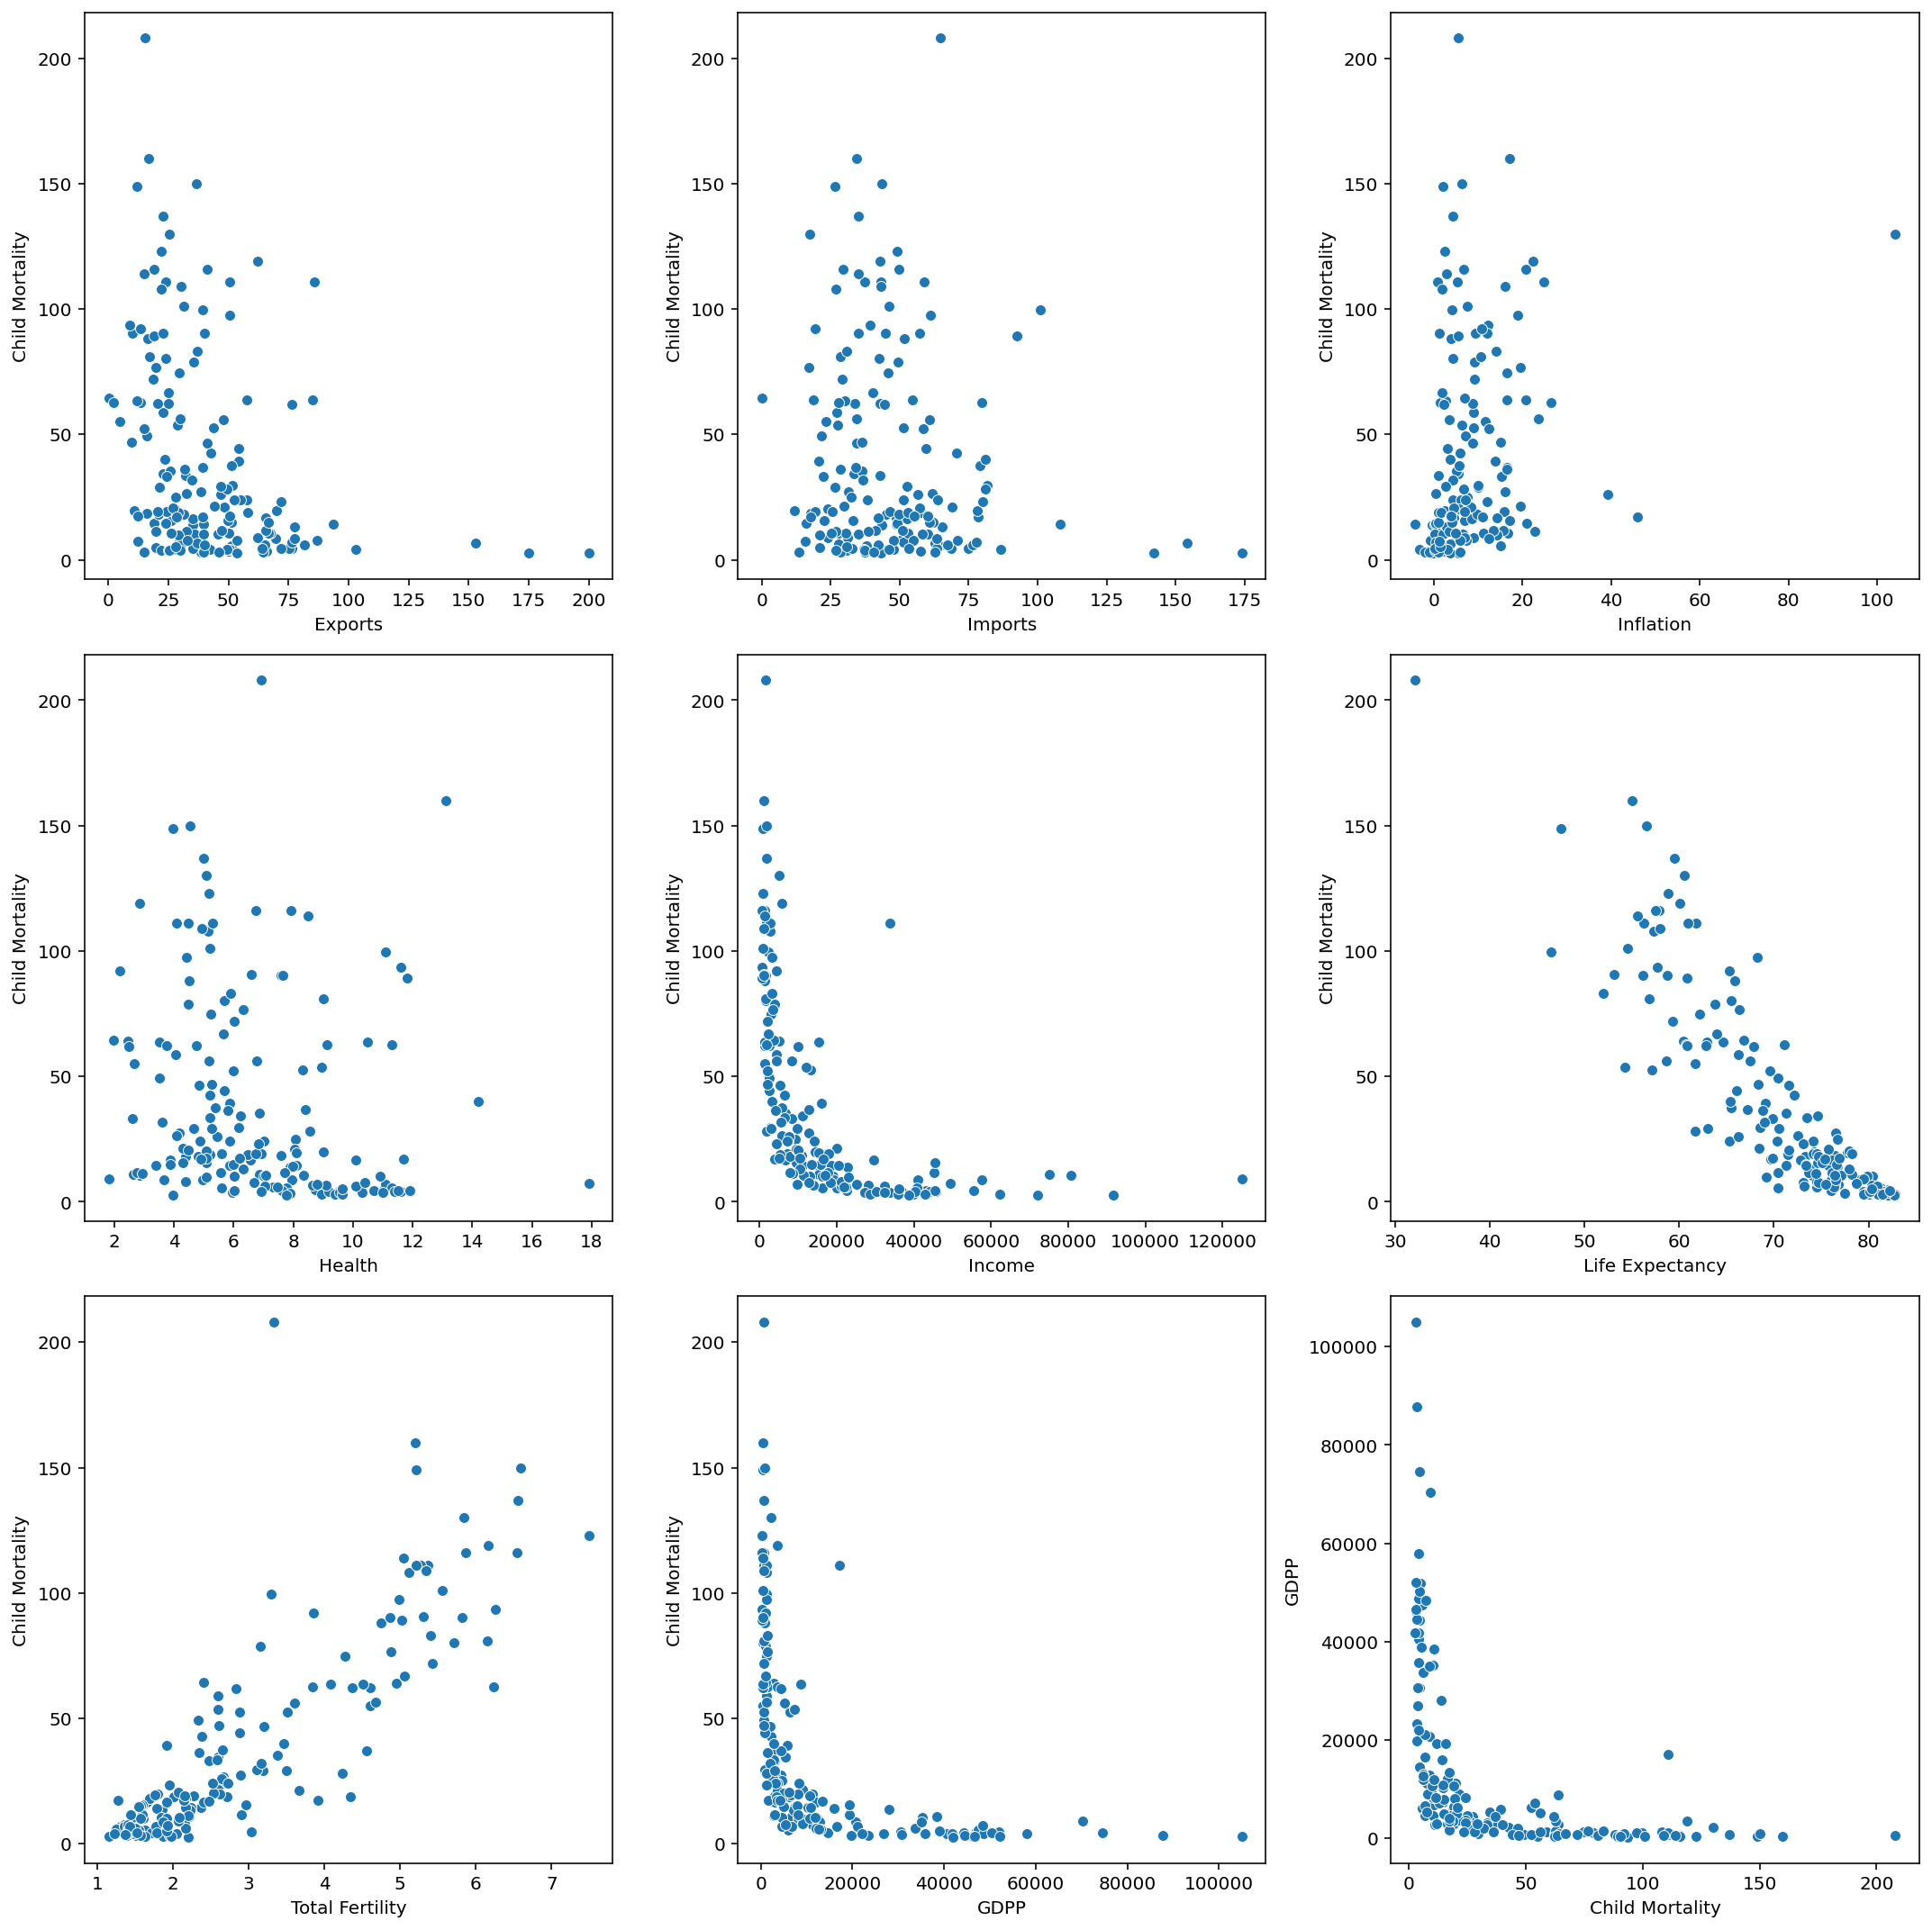

In [28]:
# Explore the continuous independent features against child_mort using scatter plots.
# Plot the nine scatter plots
plt.figure(figsize=(15, 15))

plt.subplot(3, 3, 1)
sns.scatterplot(x='exports', y='child_mort', data=ds)
plt.xlabel('Exports')
plt.ylabel('Child Mortality')

plt.subplot(3, 3, 2)
sns.scatterplot(x='imports', y='child_mort', data=ds)
plt.xlabel('Imports')
plt.ylabel('Child Mortality')

plt.subplot(3, 3, 3)
sns.scatterplot(x='inflation', y='child_mort', data=ds)
plt.xlabel('Inflation')
plt.ylabel('Child Mortality')

plt.subplot(3, 3, 4)
sns.scatterplot(x='health', y='child_mort', data=ds)
plt.xlabel('Health')
plt.ylabel('Child Mortality')

plt.subplot(3, 3, 5)
sns.scatterplot(x='income', y='child_mort', data=ds)
plt.xlabel('Income')
plt.ylabel('Child Mortality')

plt.subplot(3, 3, 6)
sns.scatterplot(x='life_expec', y='child_mort', data=ds)
plt.xlabel('Life Expectancy')
plt.ylabel('Child Mortality')

plt.subplot(3, 3, 7)
sns.scatterplot(x='total_fer', y='child_mort', data=ds)
plt.xlabel('Total Fertility')
plt.ylabel('Child Mortality')

plt.subplot(3, 3, 8)
sns.scatterplot(x='gdpp', y='child_mort', data=ds)
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')

plt.subplot(3, 3, 9)
sns.scatterplot(x='child_mort', y='gdpp', data=ds)
plt.xlabel('Child Mortality')
plt.ylabel('GDPP')

plt.tight_layout()
plt.show()


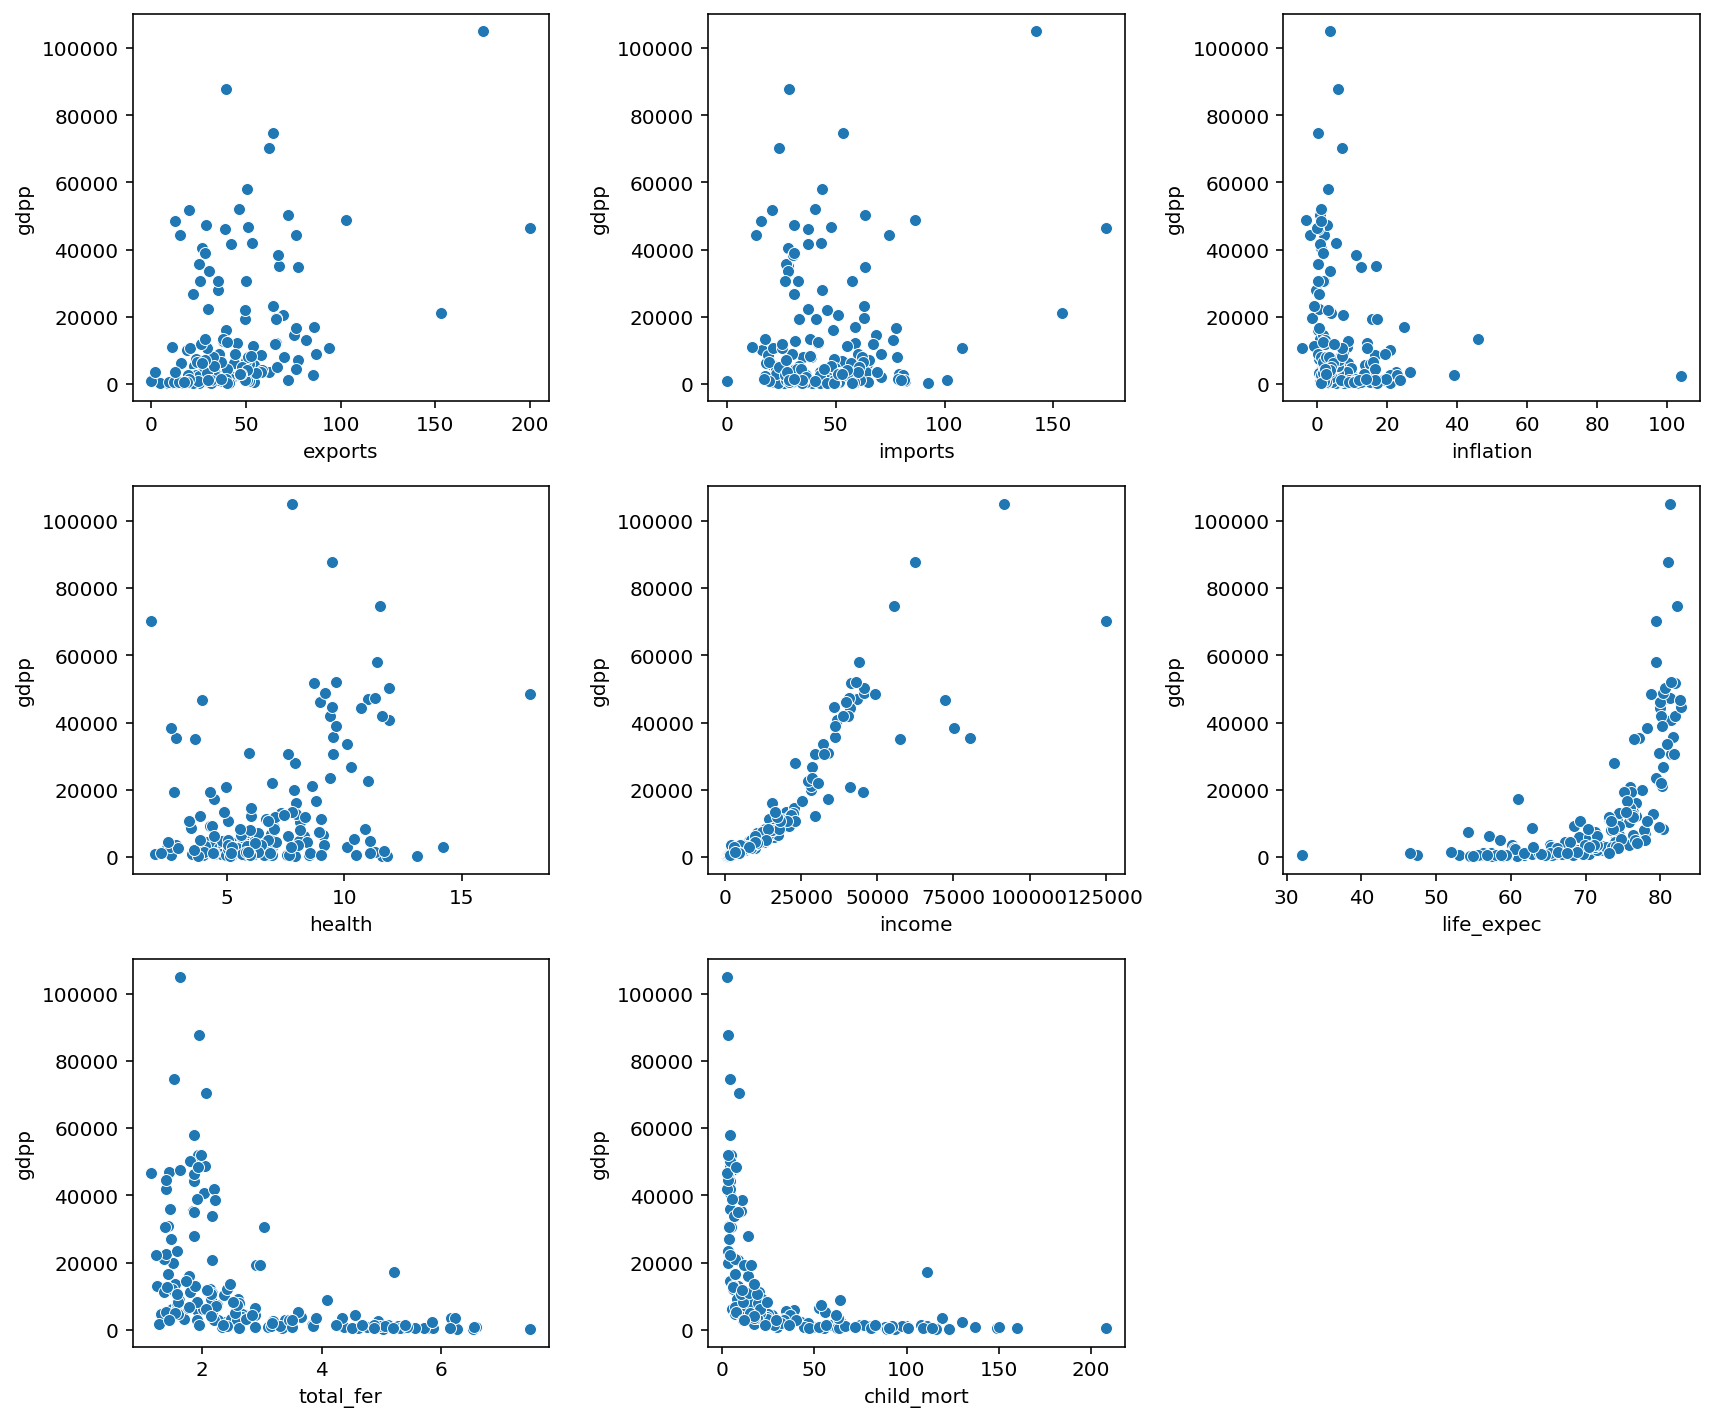

In [29]:
# Explore the continuous independent features against gdpp using scatter plots.


plt.figure(figsize=(12, 10))

plt.subplot(3, 3, 1)
sns.scatterplot(x='exports', y='gdpp', data=ds)

plt.subplot(3, 3, 2)
sns.scatterplot(x='imports', y='gdpp', data=ds)
plt.subplot(3, 3, 3)
sns.scatterplot(x='inflation', y='gdpp', data=ds)

plt.subplot(3, 3, 4)
sns.scatterplot(x='health', y='gdpp', data=ds)

plt.subplot(3, 3, 5)
sns.scatterplot(x='income', y='gdpp', data=ds)

plt.subplot(3, 3, 6)
sns.scatterplot(x='life_expec', y='gdpp', data=ds)

plt.subplot(3, 3, 7)
sns.scatterplot(x='total_fer', y='gdpp', data=ds)

plt.subplot(3, 3, 8)
sns.scatterplot(x='child_mort', y='gdpp', data=ds)

plt.tight_layout()
plt.show()

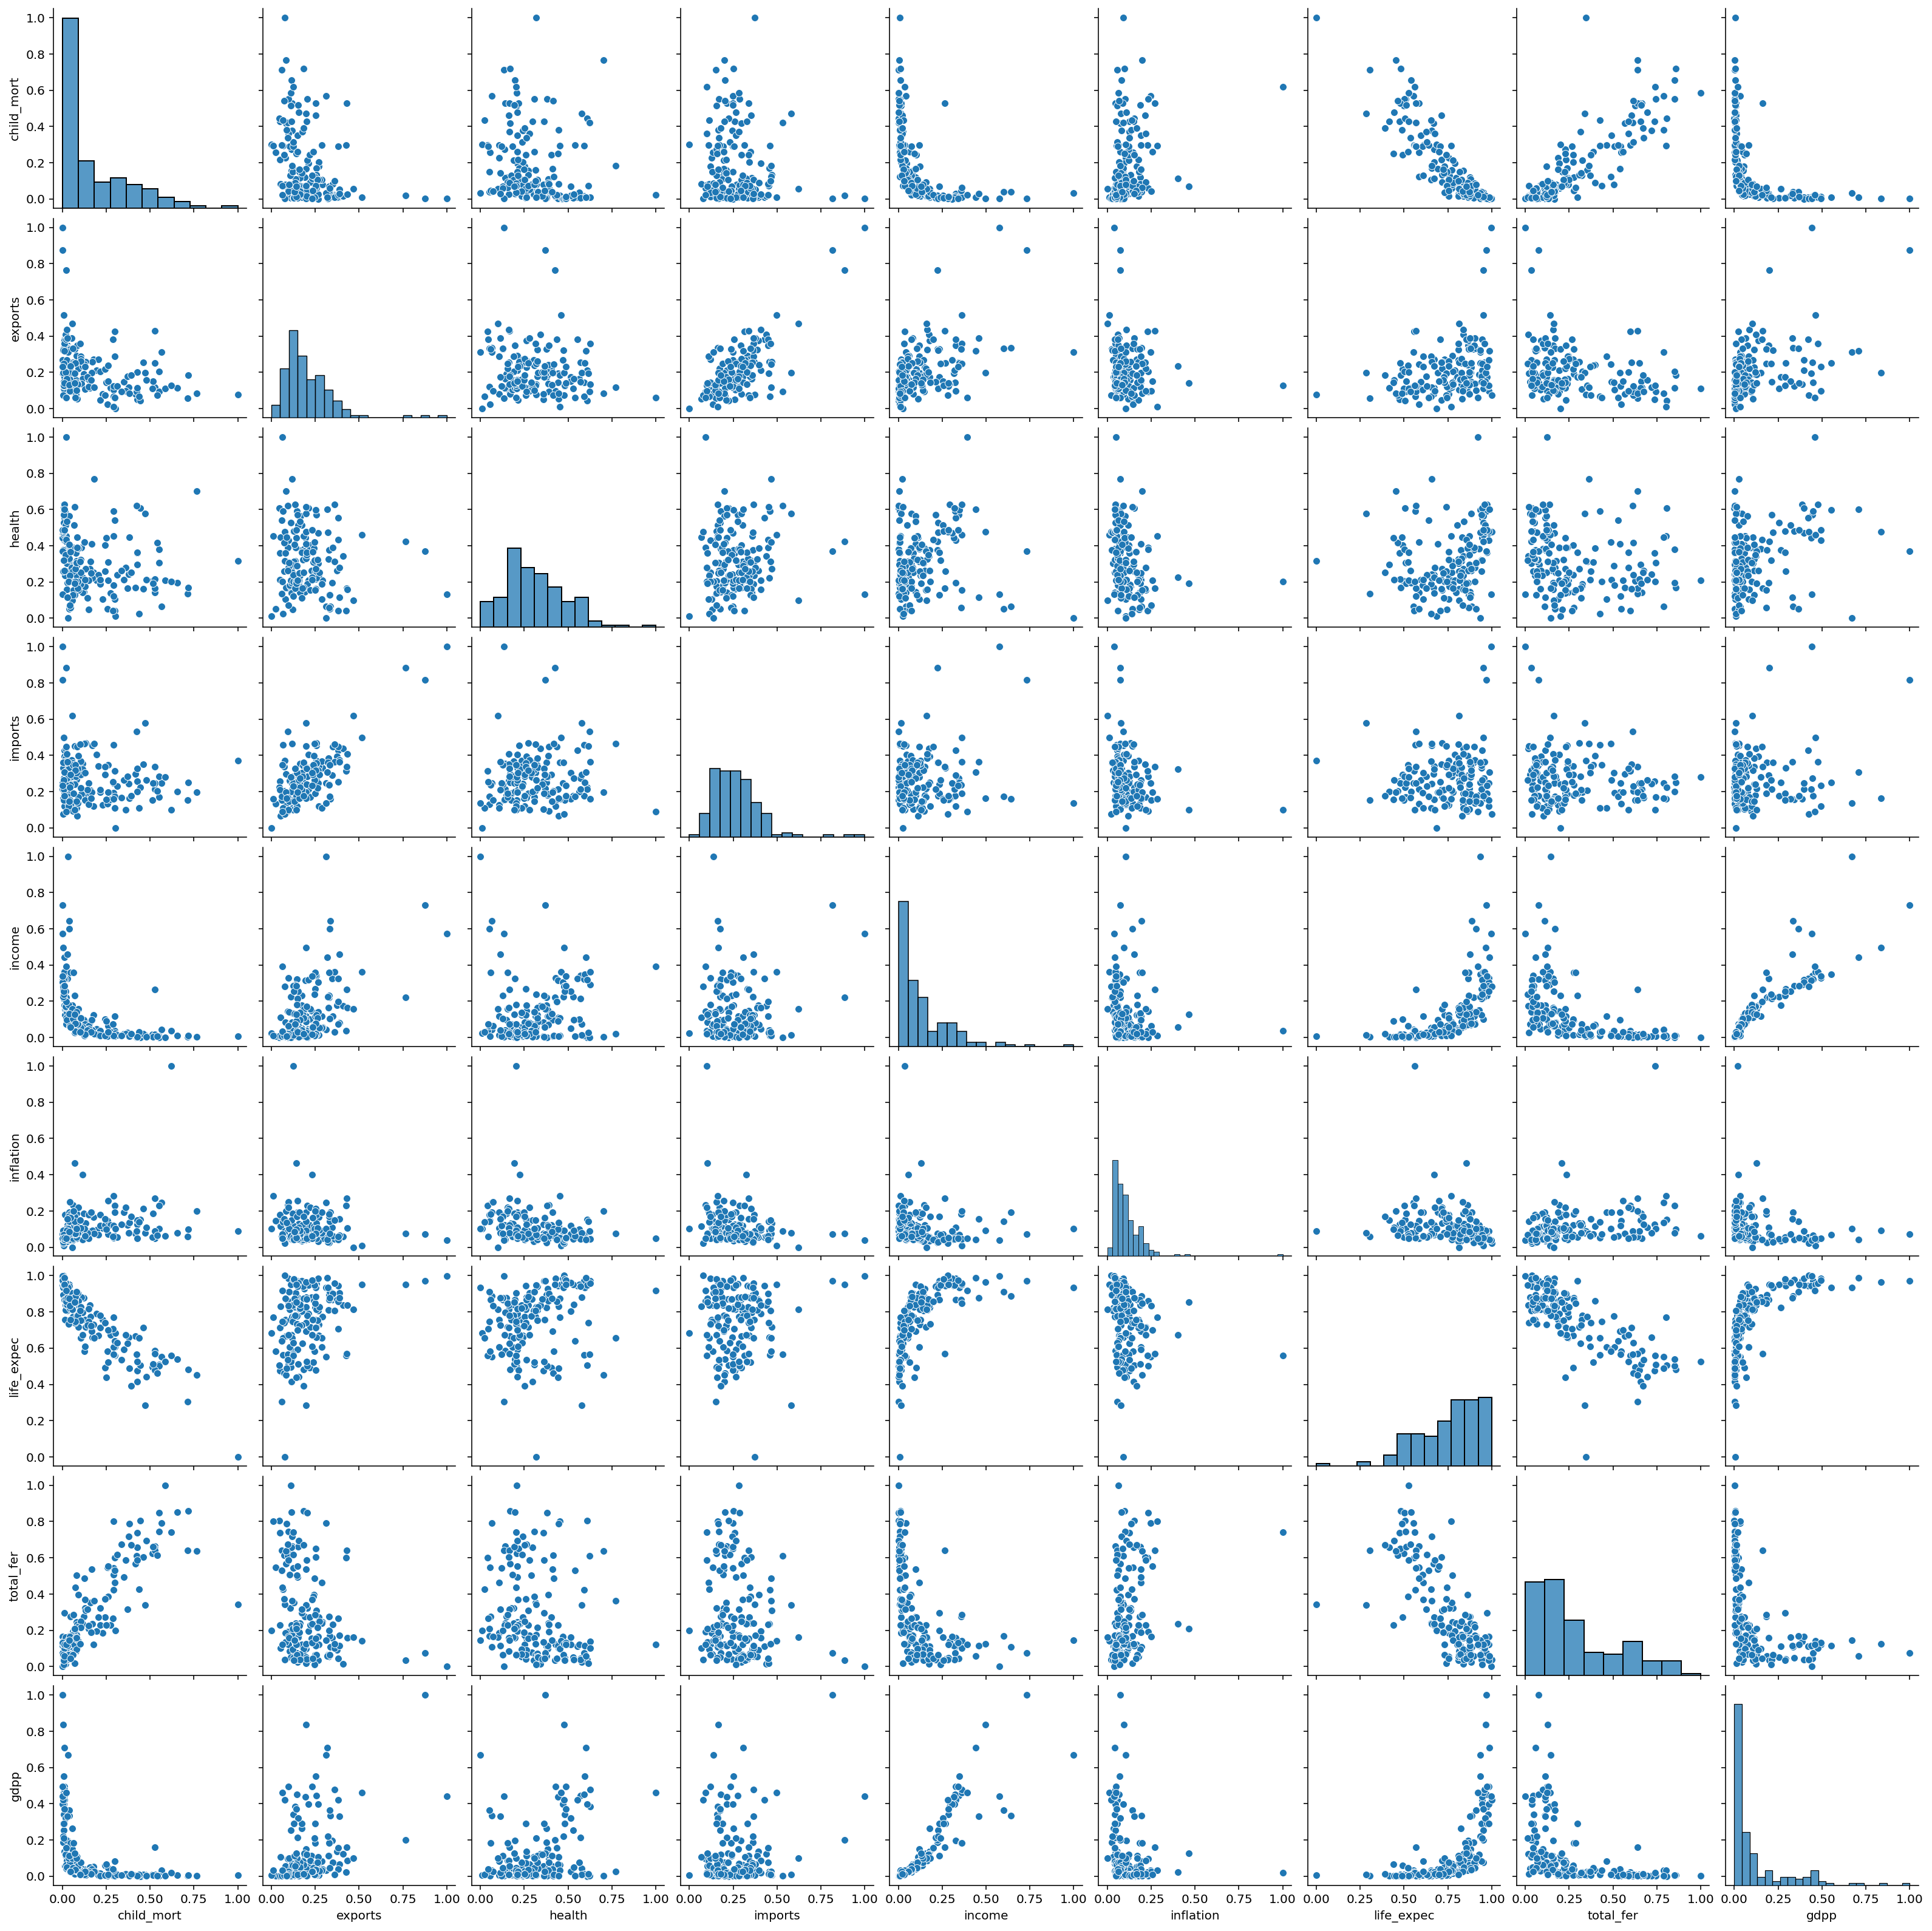

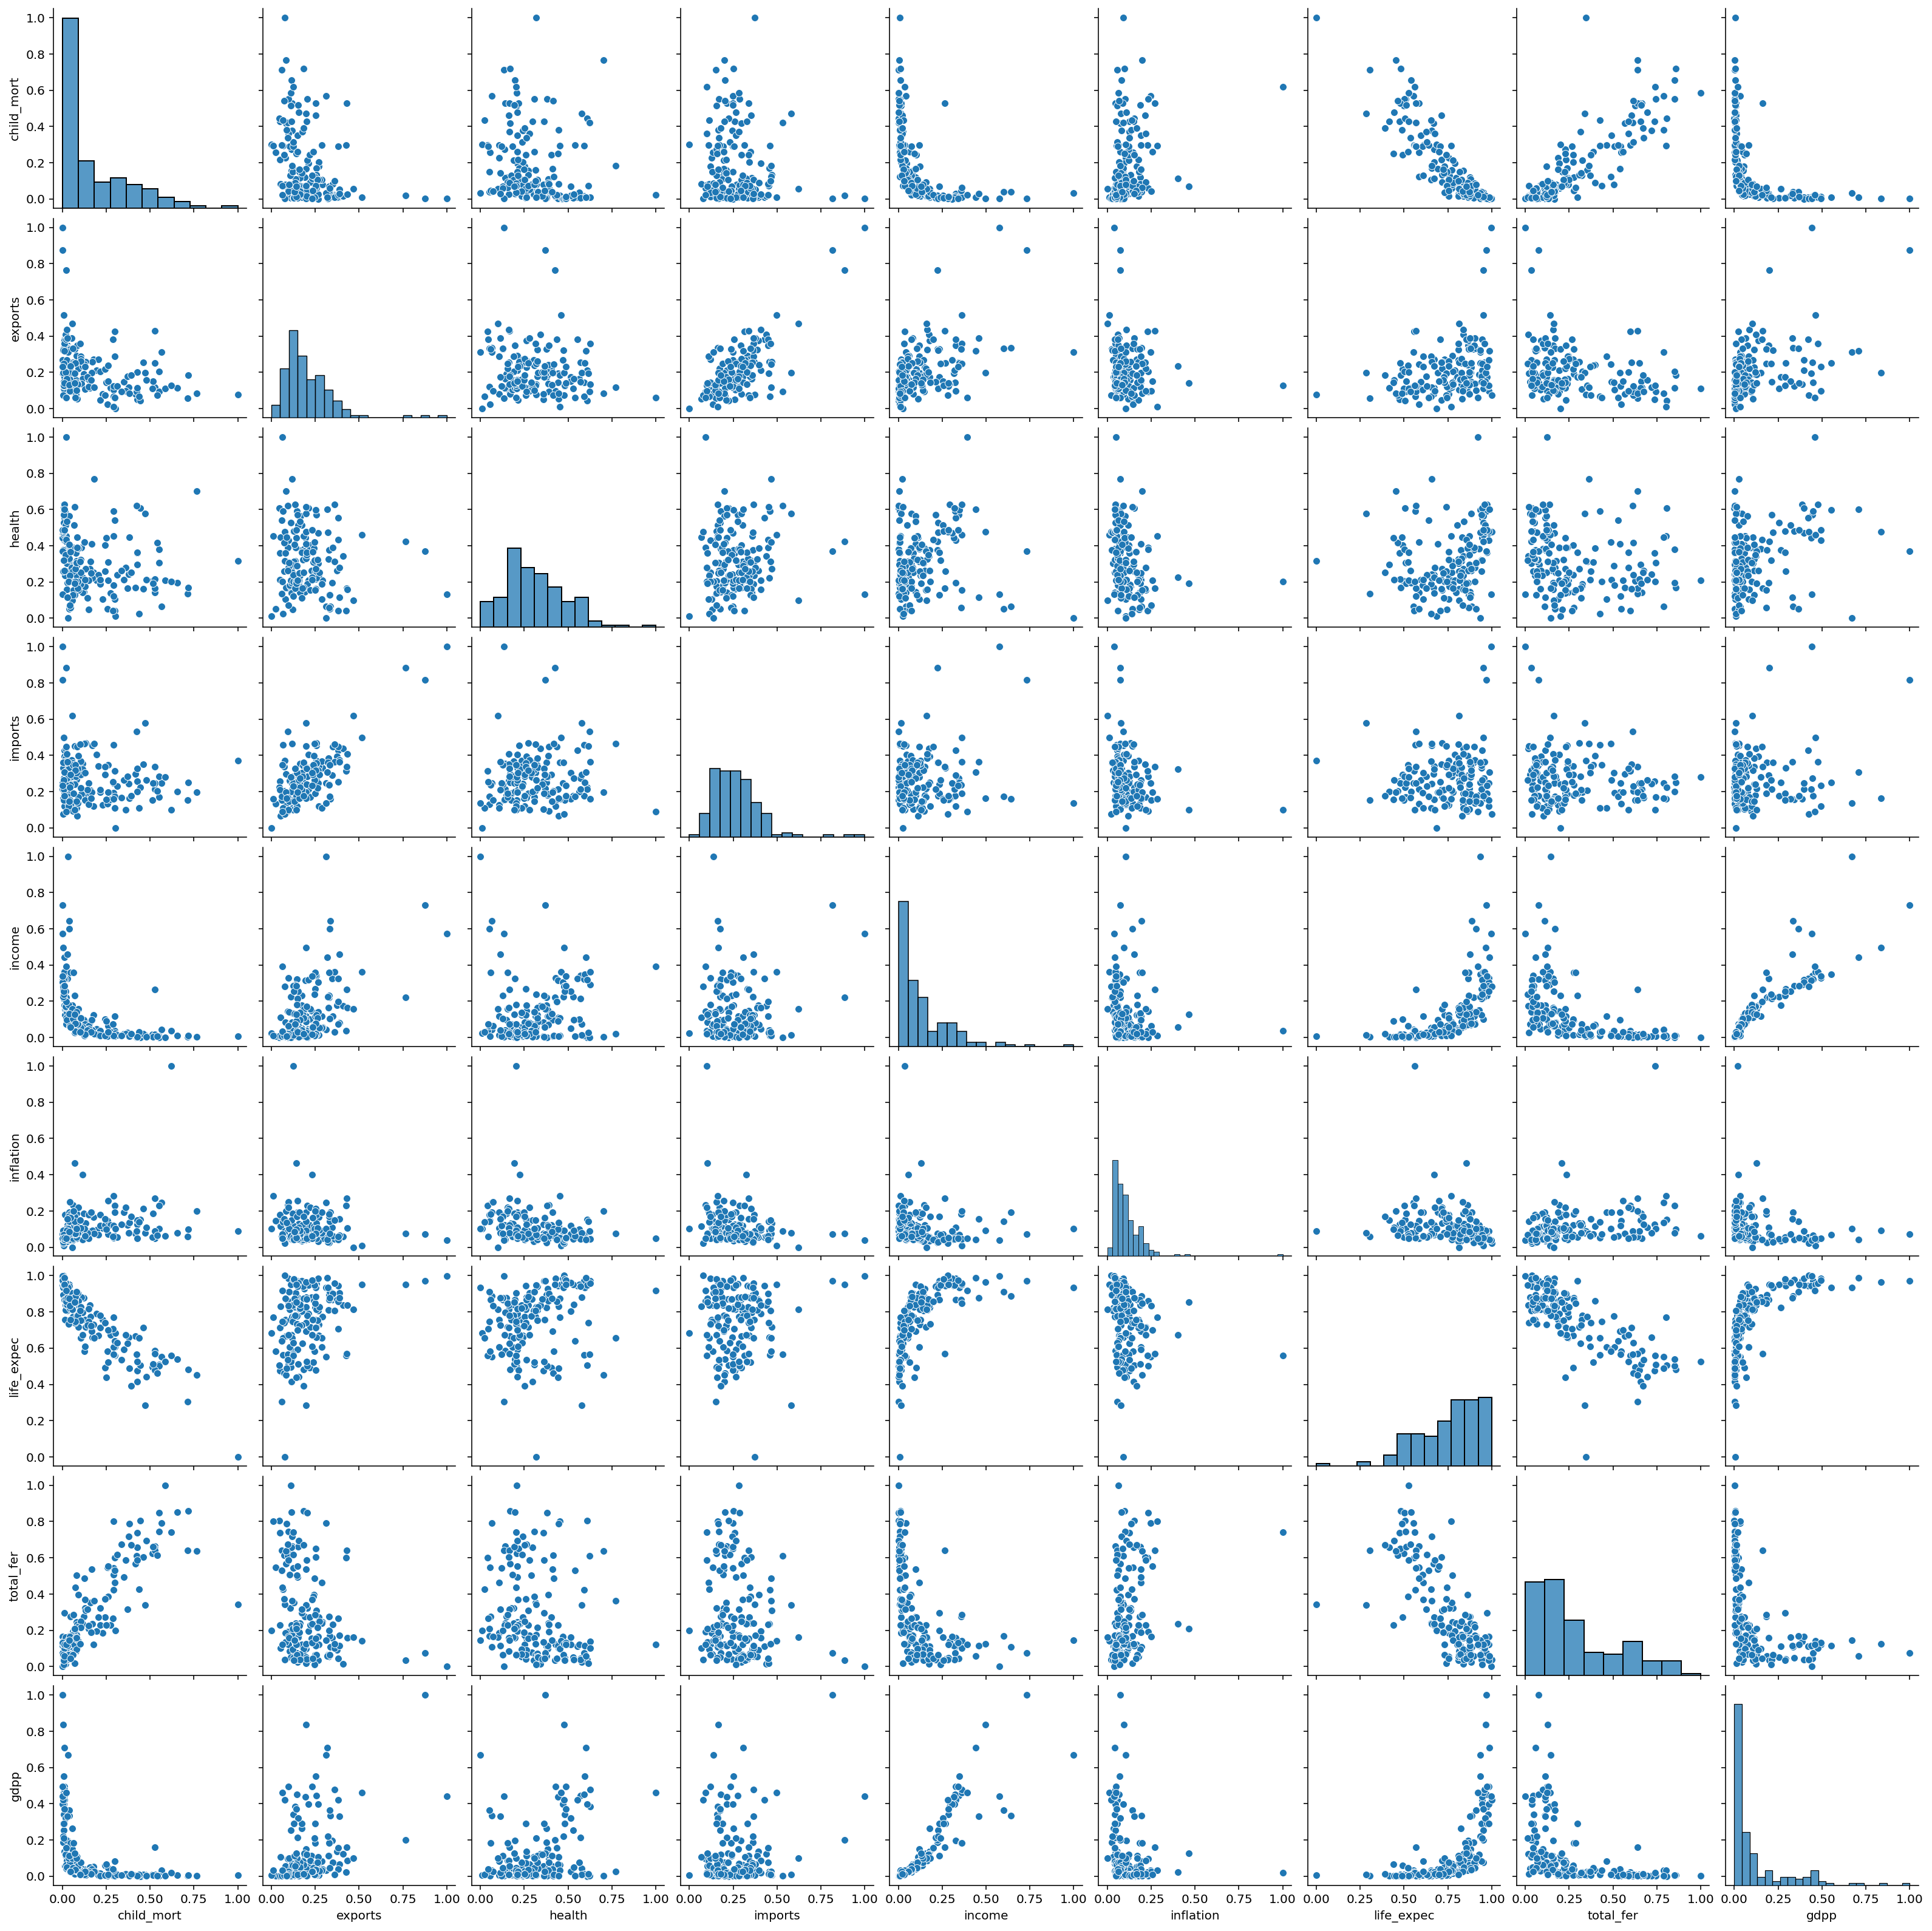

In [18]:
# Create a pair plot
# Hint: Explore seaborn pairplot
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# DataFrame
df = pd.read_csv('Country-data.csv')

# Assuming you have a DataFrame named df, define the column with strings
column_with_strings = 'country'

# Exclude the column with string values from the DataFrame
df_numeric = df.drop(column_with_strings, axis=1)

# Scale the DataFrame using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Create a pair plot
sns.pairplot(df_scaled)

column_with_strings = 'country'

# Exclude the column with string values from the DataFrame
df_numeric = df.drop(column_with_strings, axis=1)

# Scale the DataFrame using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Create a pair plot
sns.pairplot(df_scaled)


Note the peaks in the diagonal graphs that are distinct from each other or only overlap slightly. Looking at the scatter plot distributions may also give you some indication of features that would be good candidates for clustering the data.

### Scaling the Data

In [30]:
# Normalise the data using MinMaxScaler
# Name the normalised dataframe "df_scaled"

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(ds), columns=ds.columns)
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


## K-Means Clustering

### Selecting K

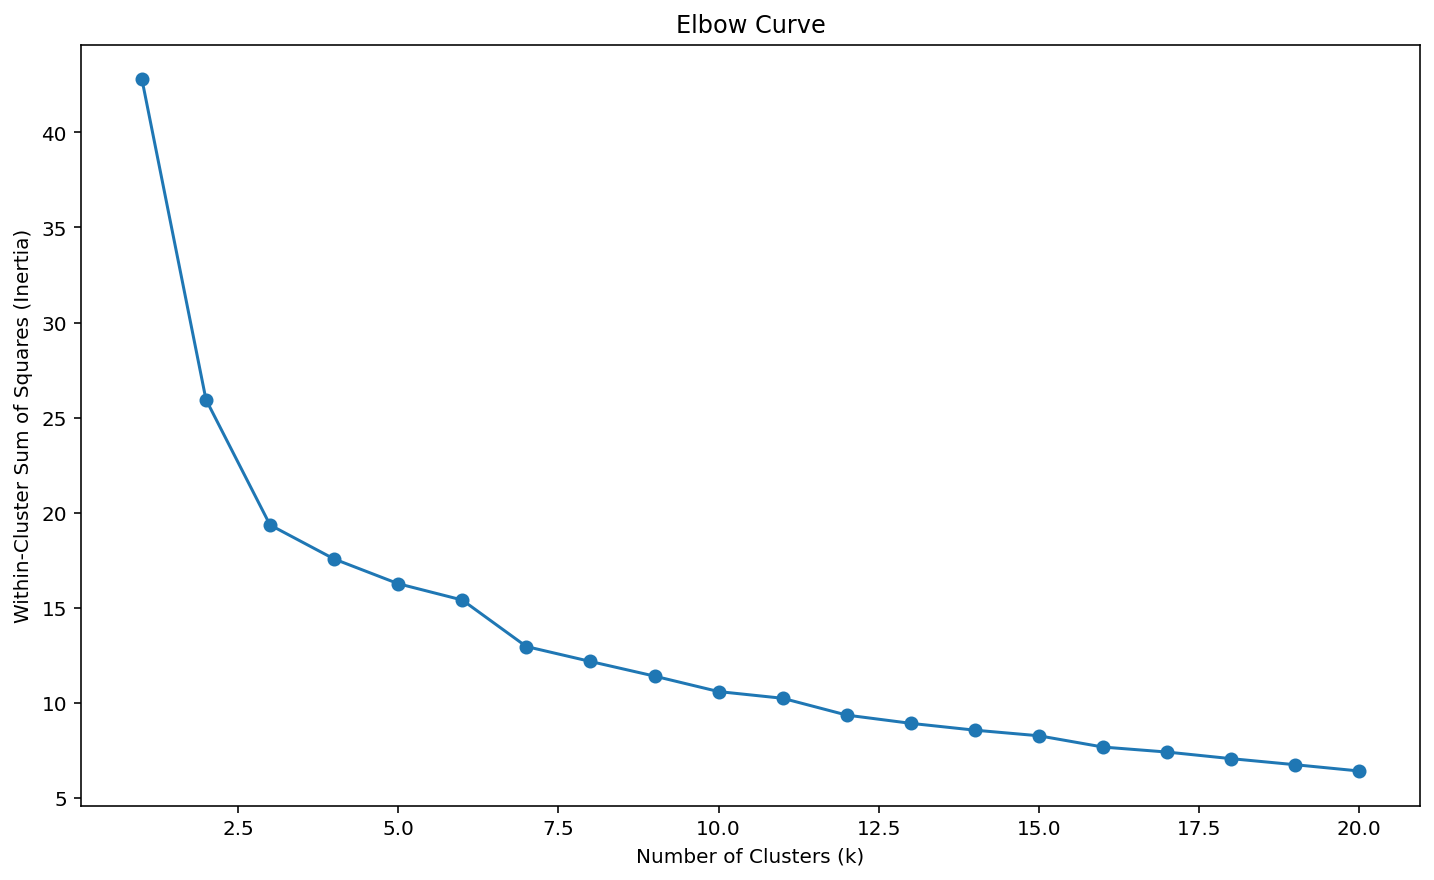

In [41]:
# Plot elbow curve
k_range = range(1,21)
inertia = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Curve')
plt.show()

    # Plot elbow curve using scaled dataset

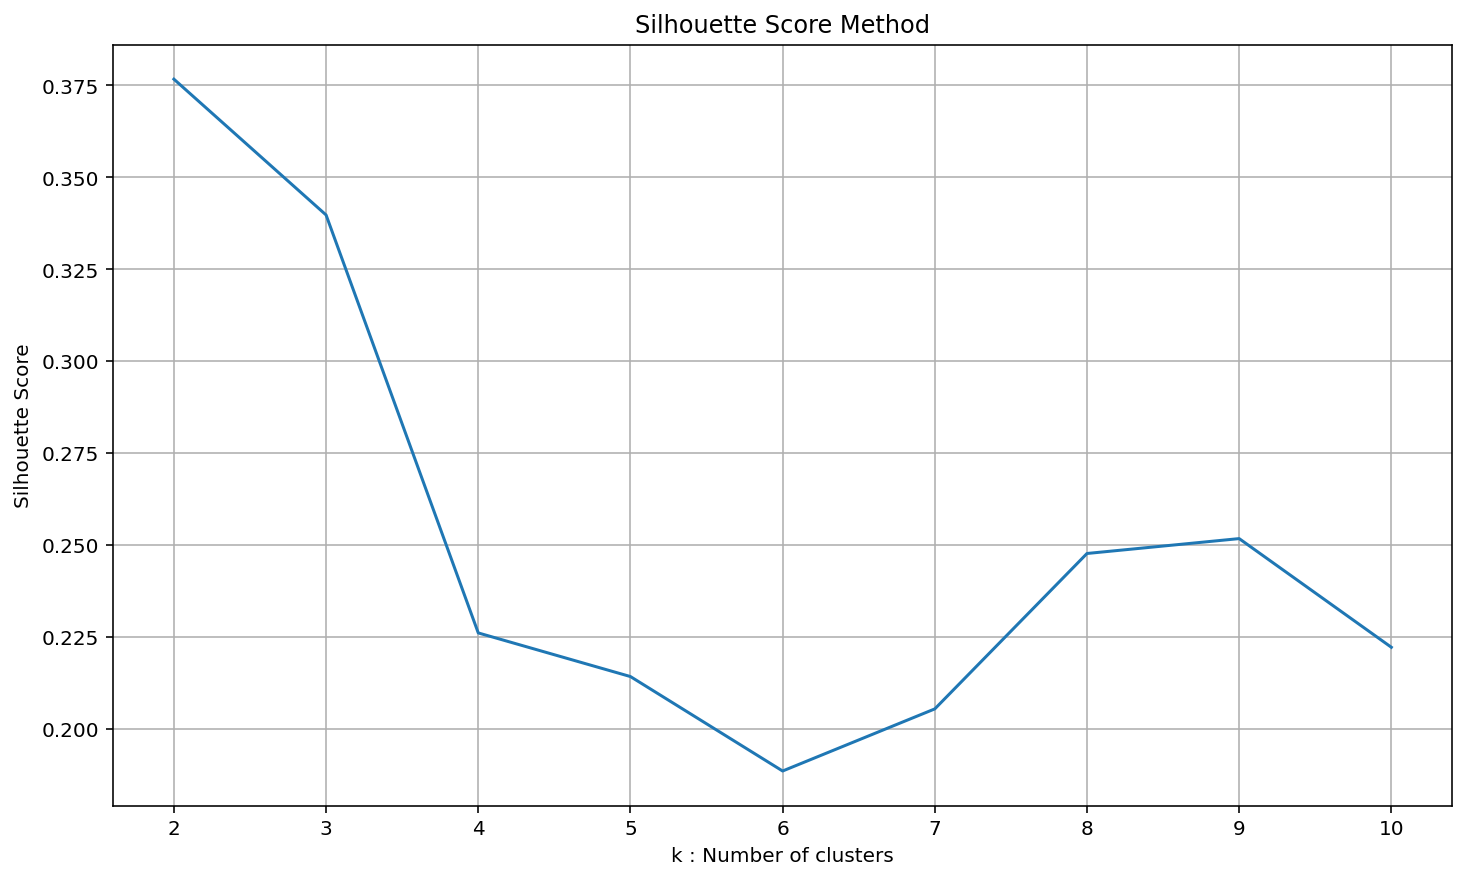

In [32]:
# Silhouette score method
kmax = 10
sil = []
plt.plot()
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.show()

Based on the elbow and silhouette score method choose a value for K.

## Fitting a K-Means Model with the selected K value

In [42]:
# Remember to set the random_state to rseed

# Normalise the dataset using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(ds), columns=ds.columns)

<function matplotlib.pyplot.show(close=None, block=None)>

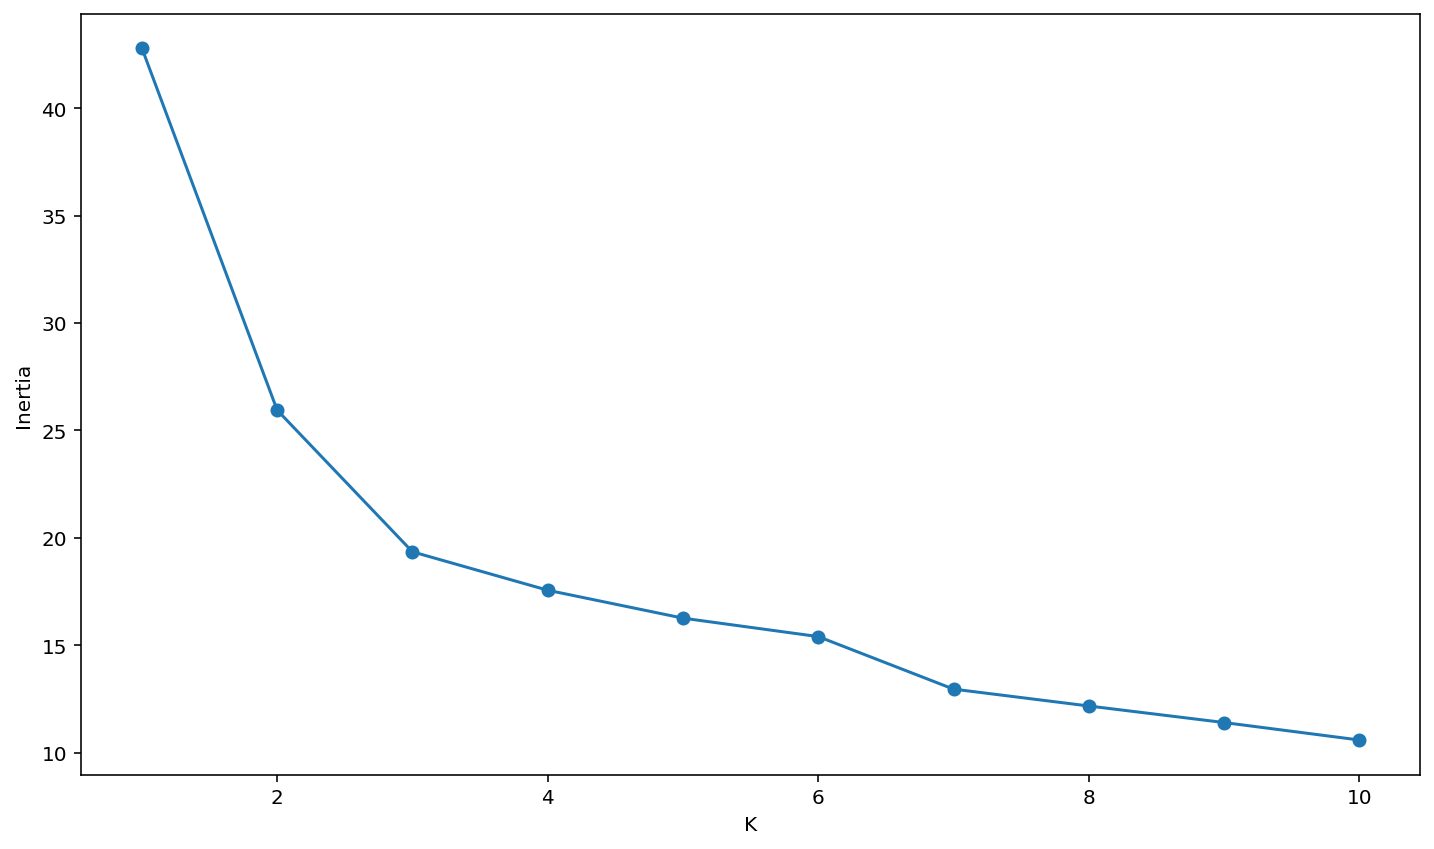

In [34]:
# Count the number of records in each cluster

within_cluster_vars = [KMeans(n_clusters=k, random_state=rseed, max_iter=500).fit(df_scaled).inertia_ for k in range(1,11)]
plt.plot(range(1,11), within_cluster_vars, marker='o')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show

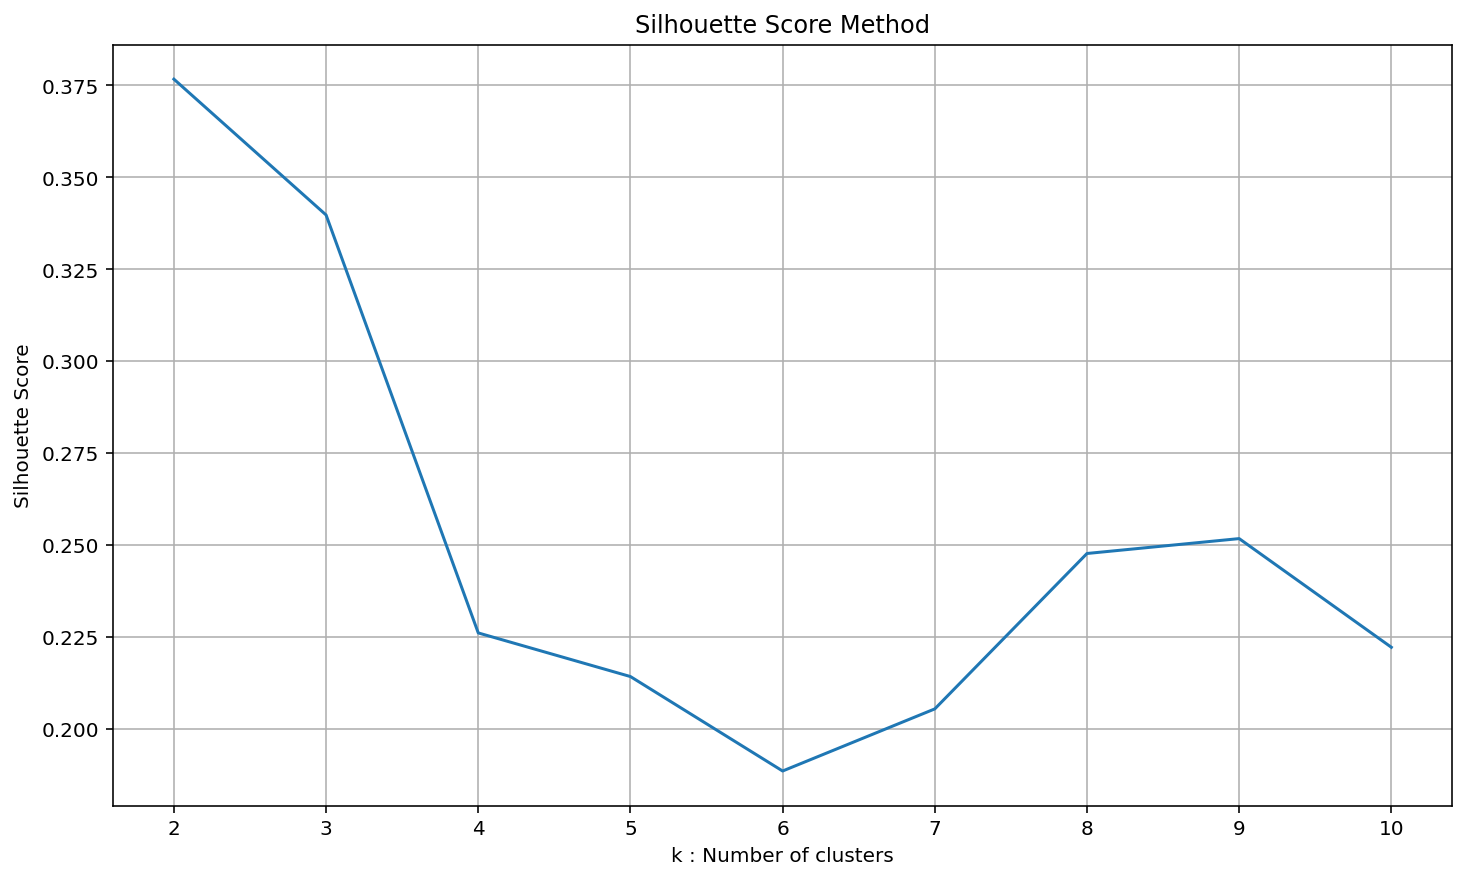

In [35]:
# Check model performance with the silhouette coefficient

sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil_scores.append(silhouette_score(df_scaled, labels, metric='euclidean'))

plt.plot(range(2, 11), sil_scores)
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(visible=True)
plt.show()

## Predictions

In [36]:
# Add the predicted cluster label column to the original dataframe

ds['Cluster'] = labels
# Fit the scaled dataset to the optimal number of clusters and report the silhouette score
k_optimal = sil_scores.index(max(sil_scores)) + 2
kmeans_optimal = KMeans(n_clusters=k_optimal, random_state=rseed, max_iter=500)
kmeans_optimal.fit(df_scaled)
labels_optimal = kmeans_optimal.labels_
sil_score_optimal = silhouette_score(df_scaled, labels_optimal, metric='euclidean')
print('Silhouette Score for optimal number of clusters:', sil_score_optimal)

Silhouette Score for optimal number of clusters: 0.37671430588173554


## Visualisation of clusters

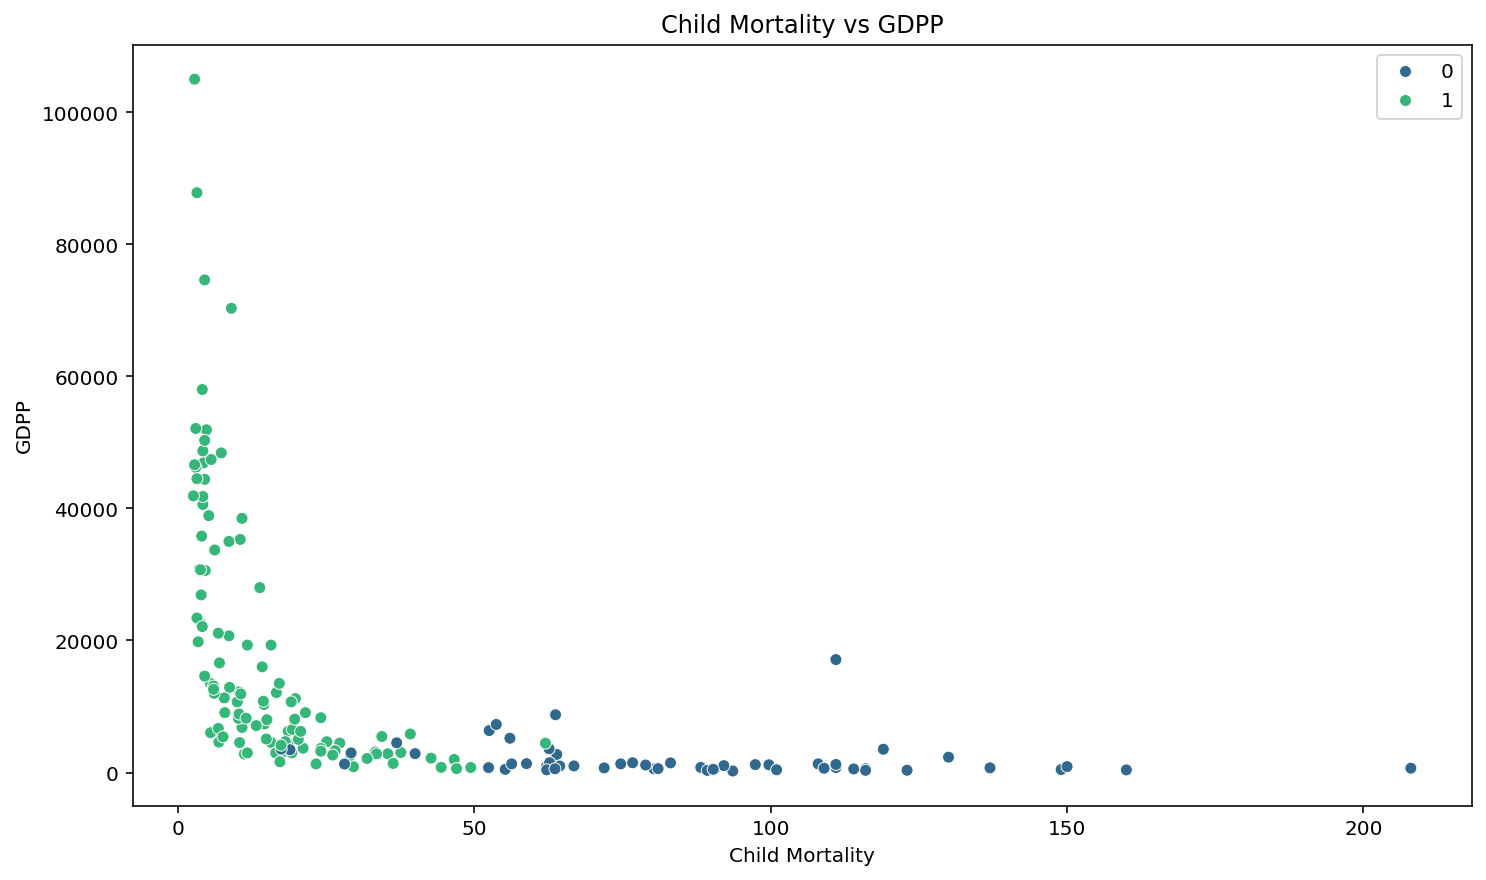

In [37]:
# Visualisation of clusters: child mortality vs gdpp

sns.scatterplot(x='child_mort', y='gdpp', hue=labels_optimal, palette='viridis', data=ds)
plt.title('Child Mortality vs GDPP')
plt.xlabel('Child Mortality')
plt.ylabel('GDPP')
plt.show()

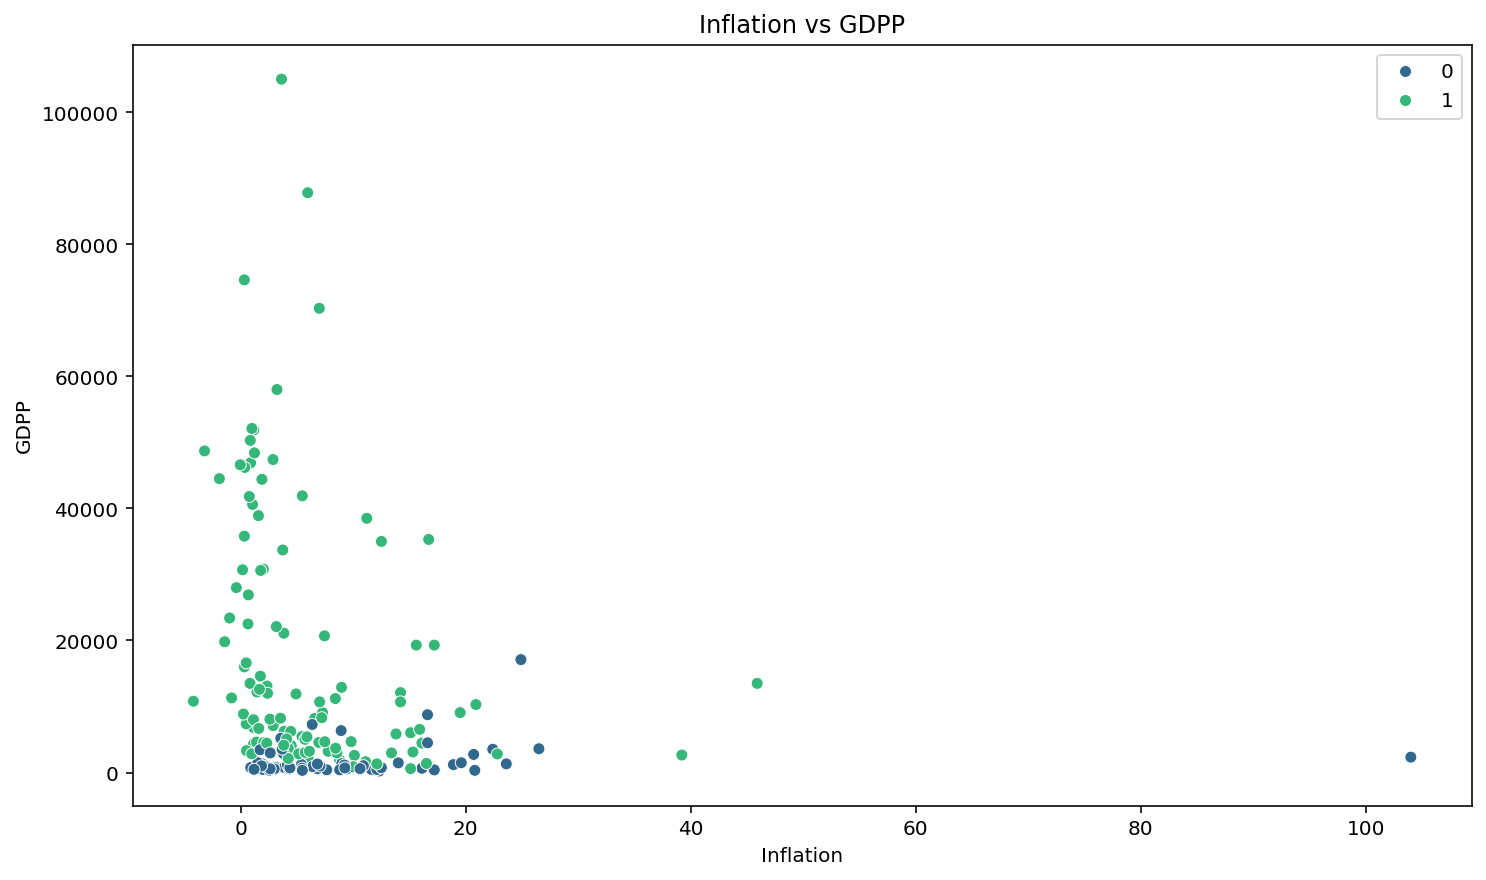

In [38]:
# Visualisation of clusters: inflation vs gdpp

sns.scatterplot(x='inflation', y='gdpp', hue=labels_optimal, palette='viridis', data=ds)
plt.title('Inflation vs GDPP')
plt.xlabel('Inflation')
plt.ylabel('GDPP')
plt.show()

## Conclusions

Label the groups of countries in the plots you created based on child mortality, GDPP and inflation. You may use [terms](https://en.wikipedia.org/wiki/Developing_country#Terms_used_to_classify_countries) such as: least developed, developing and developed, or low, low-middle, upper-middle and high income. Alternatively, simply rank them from highest to lowest. Justify the labels you assign to each group.


**Answer here: Least Developed: This group consists of countries with high child mortality rates, low GDPP, and high inflation. These countries are typically characterized by lower income levels, weaker healthcare systems, and higher poverty rates.\*\***

**\*\*Developing: This group includes countries with moderate child mortality rates, medium to high GDPP, and relatively moderate inflation. These countries are in the process of economic and social development and often have improving healthcare systems and increasing standards of living.\*\***

**\*\*Developed: This group comprises countries with low child mortality rates, high GDPP, and low inflation. These countries generally have advanced healthcare systems, high income levels, and strong economies.\*\***

**\*\*These labels are assigned based on the patterns and trends observed in the scatter plots and the descriptive statistics of the variables. However, the specific labels and definitions may vary depending on the specific context and criteria used.\*\***

